# Classification with Logistic Regression

## Set-Up

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Data Generator

EXAMPLE 13.6 from DEVORE

In [4]:
from src.preprocessing import Preprocessing
data = np.loadtxt("../data.csv", delimiter=",")
X = Preprocessing.build_design_matrix(data[:, [0]])
y = data[:, [1]]

## Plot Scatter 

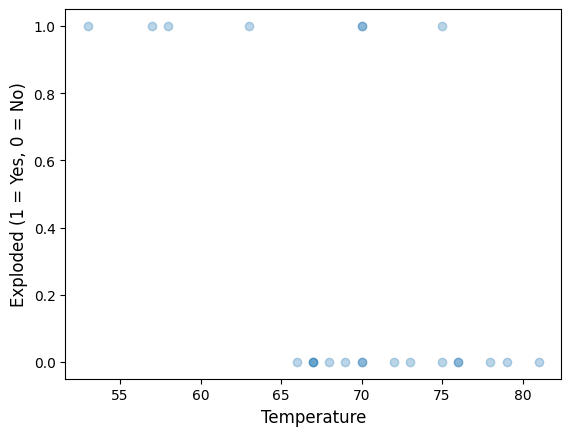

In [5]:
fig, ax = plt.subplots(1,1)
ax.scatter(X[:,1], y, alpha=.3)
ax.set_ylabel("Exploded (1 = Yes, 0 = No)", fontsize=12)
ax.set_xlabel("Temperature", fontsize=12)
plt.show()

In [6]:
from src.algorithms import PLA
from src.models import LinearModel, LogisticModel
from src.optimizers import SteepestDescentMethod, NewtonsMethod
from src.analyzers import PlotterAlgorithmObserver
from src.stop_criteria import CompositeStopCriteria, MaxIterationStopCriteria, MinErrorStopCriteria

In [7]:
def plot_sigmoide(model):

    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    x = np.array([np.linspace(min(X[:,1]), max(X[:,1]), 50)]).T
    Xs = Preprocessing.build_design_matrix(x)
    fig, ax = plt.subplots(1,1)
    ax.scatter(X[:,1], y, alpha=.3)
    ax.plot(x, model.predict(Xs))
    # ax.plot(x, sigmoid(model.w[0] + model.w[1]*x))
    plt.show()

def plot_strategy(optimizer, learning_rate, model):
    alg = PLA(optimizer, model)
    min_error = 0.01
    max_iteration = 100

    np.random.seed(seed=0)
    stop_criteria = CompositeStopCriteria()
    stop_criteria.add(MinErrorStopCriteria(min_error=min_error))
    stop_criteria.add(MaxIterationStopCriteria(max_iteration=max_iteration))

    analyzer = PlotterAlgorithmObserver()
    alg.add(analyzer)

    alg.fit(X, y, stop_criteria)

    final_iteration = max(analyzer.iterations)
    print(f"Final Iteration: {final_iteration}")
    print(f"Final Error: {analyzer.errors[final_iteration]}")
    print(f"Final Weights: {analyzer.weights[final_iteration]}")
    analyzer.plot()
    plot_sigmoide(model)

Final Iteration: 99
Final Error: 16.130082413689948
Final Weights: [[ 0.00509785]
 [-0.03012047]]


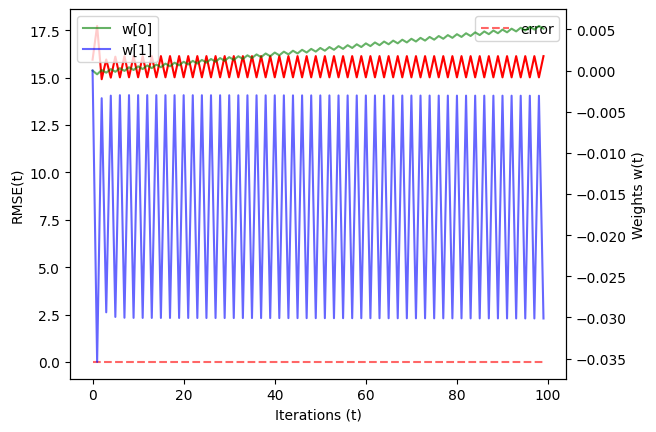

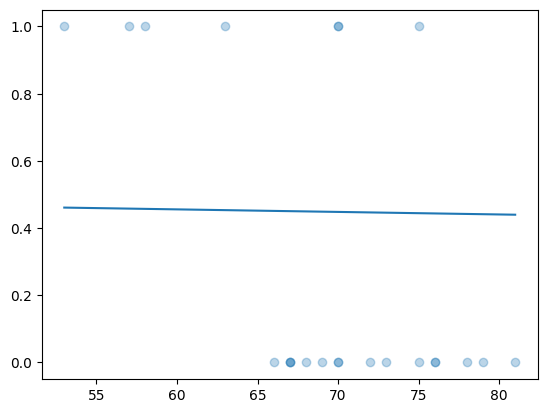

In [8]:
learning_rate = 0.0001 
model = LogisticModel()
optimizer = SteepestDescentMethod(learning_rate)
plot_strategy(optimizer, learning_rate, model)

Final Iteration: 99
Final Error: 10.157596360540383
Final Weights: [[15.0417312 ]
 [-0.23214489]]


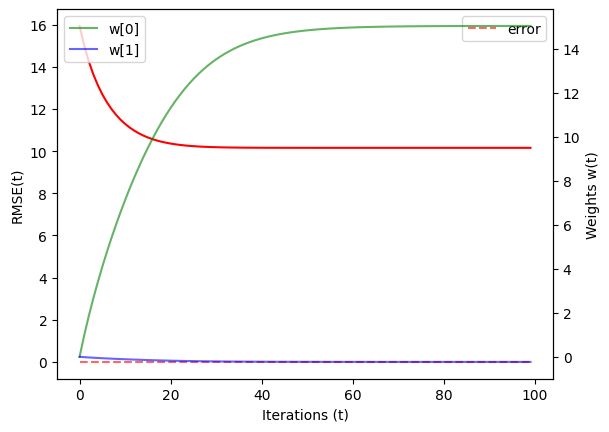

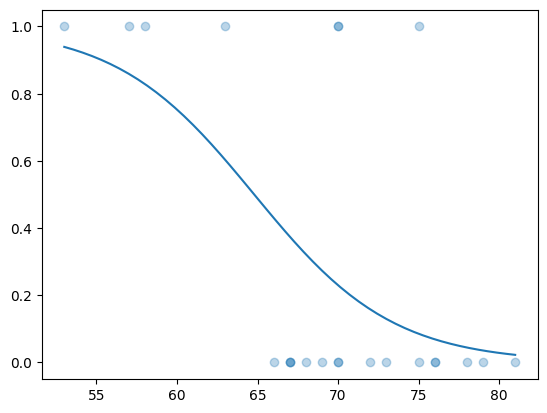

In [9]:
learning_rate = 0.1
model = LogisticModel()
optimizer = NewtonsMethod(learning_rate)
plot_strategy(optimizer, learning_rate, model)